Kemal Demirel

191104091

HW2- SORU2

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1-Load a gray scale image

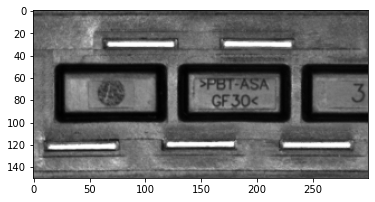

In [11]:
gray_scale_image = cv2.imread('connectors.png',0)
plt.imshow(gray_scale_image, cmap='gray')
plt.show()

### 2- Implement a 2D Gaussian Kernel with size 5*5 and sigma = 1.0. Kernel normalized therefore its sum equals to 1.

In [16]:
def gaussianKernel2D(sigma, kernel_size):
    grid = np.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.)
    x, y = np.meshgrid(grid, grid)
    gaussian_kernel = np.exp(-(x**2 + y**2) / (2. * sigma**2)) / (2. * np.pi * sigma**2)
    gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)
    return gaussian_kernel    

### 3-Convolve the image with the Gaussian kernel using a sliding window approach. Do not use any libraries for convolution.

In [18]:
pad_size = 5 // 2
padded_image = np.pad(gray_scale_image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')

Filtered image with zeros is created

In [19]:
filtered_img = np.zeros_like(gray_scale_image)

In [20]:
gaussian_kernel = gaussianKernel2D(1.0, 5)

In [21]:
for i in range(pad_size, gray_scale_image.shape[0] + pad_size):
    for j in range(pad_size, gray_scale_image.shape[1] + pad_size):
        window = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
        filtered_img[i - pad_size, j - pad_size] = np.sum(window * gaussian_kernel)

Compare images

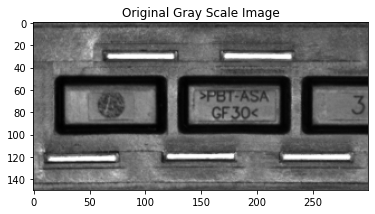

In [22]:
plt.imshow(gray_scale_image, cmap='gray')
plt.title('Original Gray Scale Image')
plt.show()

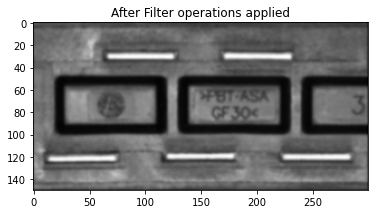

In [23]:
plt.imshow(filtered_img, cmap='gray')
plt.title('After Filter operations applied')
plt.show()

### 4 - Apply subsampling to the filtered image by taking every other pixel along both dimensions (Hint: subsampled_img[i, j] = img[i*factor, j*factor]

In [ ]:
a = 5